In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [2]:
tf.__version__

'0.11.0'

In [3]:
D = np.random.randn(1000, 500)
hidden_layer_sizes = [500]*10
nonlinearities = ['tanh']*len(hidden_layer_sizes)

act = {'relu':lambda x:np.maximum(0,x), 'tanh':lambda x:np.tanh(x)}
Hs = {}
for i in xrange(len(hidden_layer_sizes)):
    X = D if i == 0 else Hs[i-1]
    fan_in = X.shape[1]
    fan_out = hidden_layer_sizes[1]
    #W = np.random.randn(fan_in, fan_out) * 0.01 #layer initialization 
    W = np.random.randn(fan_in, fan_out) * 1.0 #layer initialization 
    #W = np.random.randn(fan_in, fan_out)/np.sqrt(fan_in) #layer initialization
    
    H = np.dot(X, W)
    H = act[nonlinearities[i]](H)
    Hs[i] = H # Cache result of this layer 

input layer had mean -0.000363 and std 1.001659 
hidden layer 1 had mean 0.000562 and std 0.981965 
hidden layer 2 had mean 0.002146 and std 0.981575 
hidden layer 3 had mean -0.001575 and std 0.981685 
hidden layer 4 had mean -0.001758 and std 0.981851 
hidden layer 5 had mean 0.001238 and std 0.981532 
hidden layer 6 had mean -0.000244 and std 0.981532 
hidden layer 7 had mean -0.003015 and std 0.981634 
hidden layer 8 had mean -0.001459 and std 0.981592 
hidden layer 9 had mean 0.000800 and std 0.981780 
hidden layer 10 had mean -0.002871 and std 0.981574 


(array([  8395.,   8788.,   9552.,   9788.,  10476.,  10932.,  11239.,
         11849.,  12111.,  12286.,  12676.,  12833.,  13087.,  13095.,
         13351.,  13418.,  13405.,  13047.,  12992.,  12584.,  12293.,
         12093.,  11779.,  11325.,  10869.,  10348.,  10058.,   9414.,
          8649.,   8450.]),
 array([-1.        , -0.93333333, -0.86666667, -0.8       , -0.73333333,
        -0.66666667, -0.6       , -0.53333333, -0.46666667, -0.4       ,
        -0.33333333, -0.26666667, -0.2       , -0.13333333, -0.06666667,
         0.        ,  0.06666667,  0.13333333,  0.2       ,  0.26666667,
         0.33333333,  0.4       ,  0.46666667,  0.53333333,  0.6       ,
         0.66666667,  0.73333333,  0.8       ,  0.86666667,  0.93333333,  1.        ]),
 <a list of 30 Patch objects>)

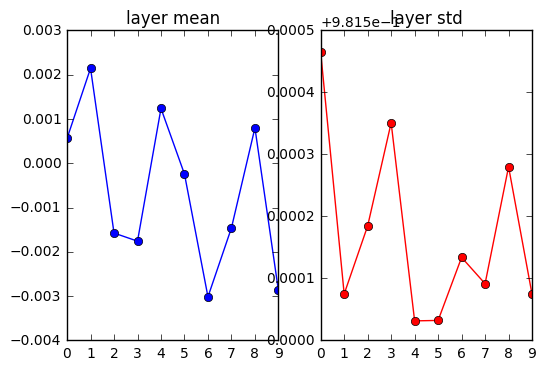

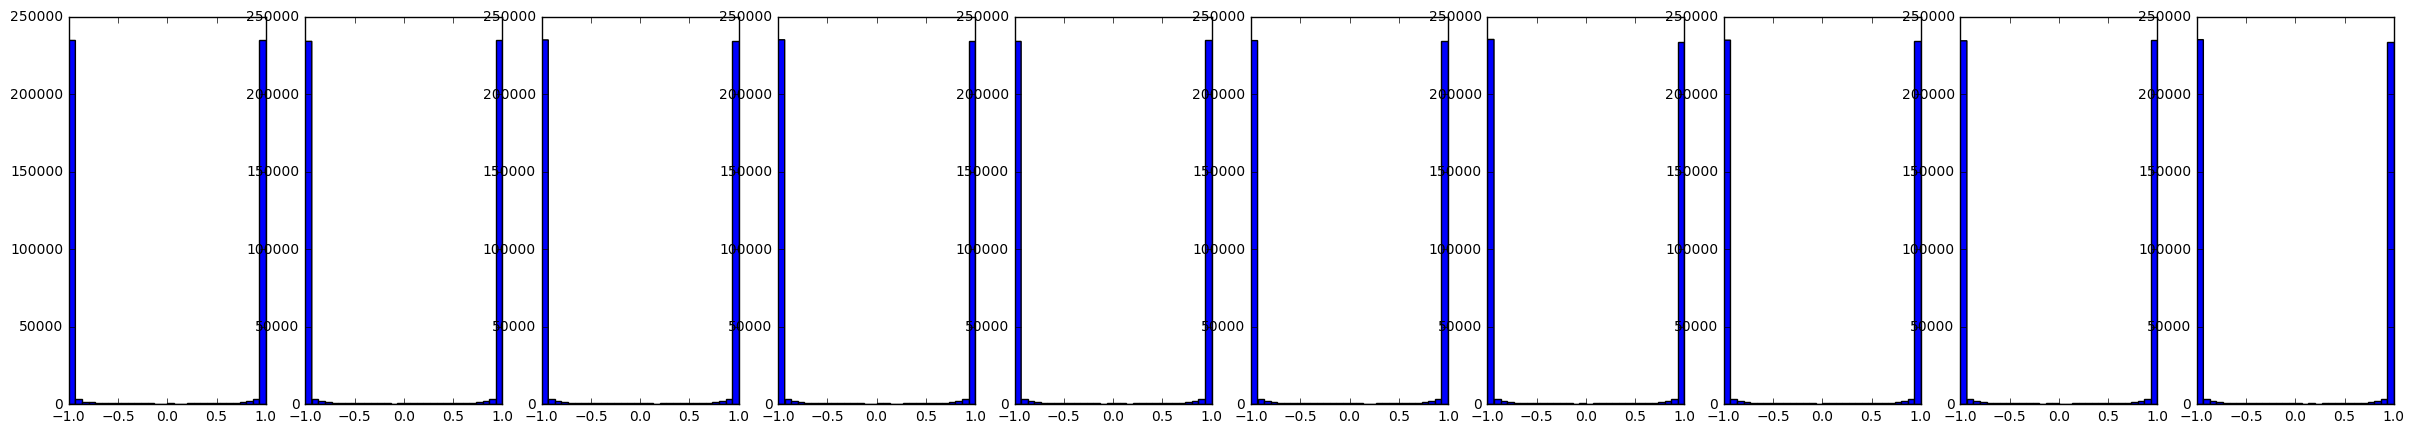

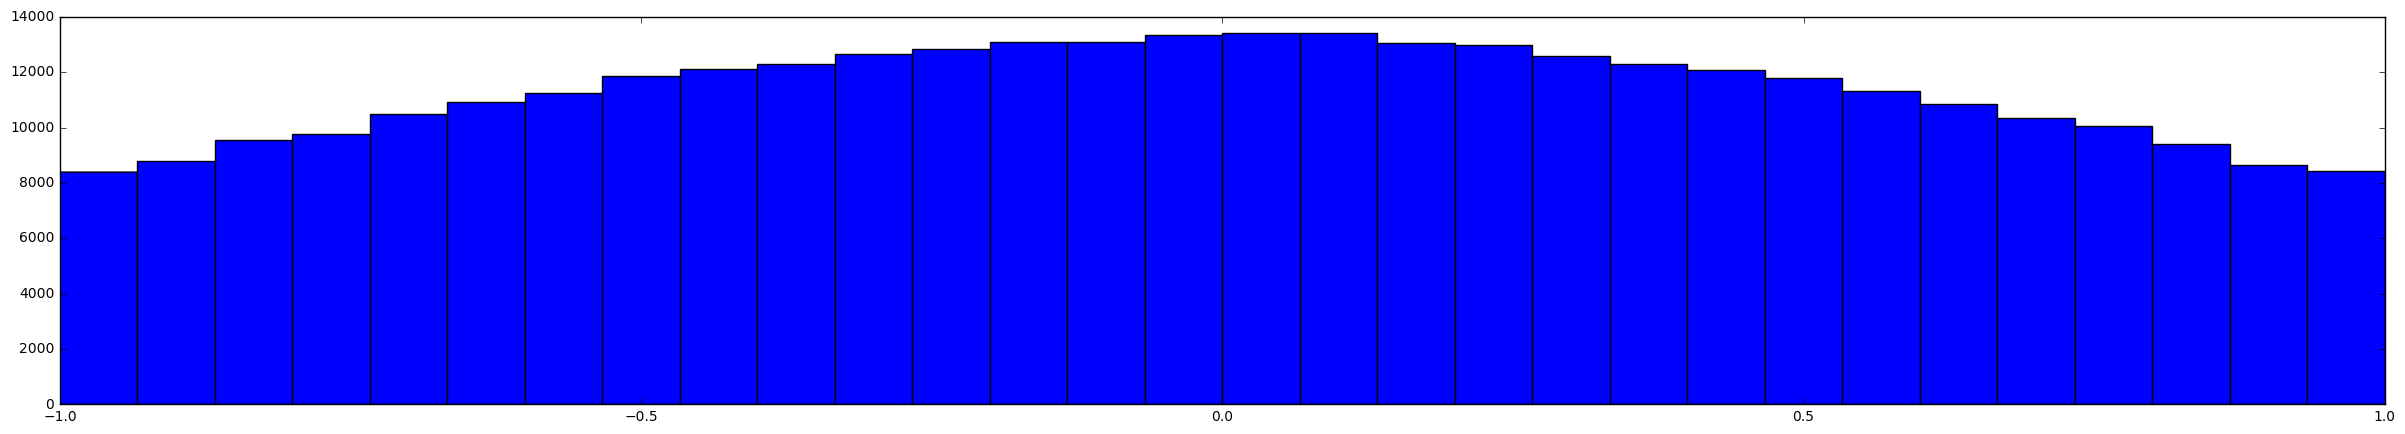

In [4]:
# look at distribution at each layer 
print 'input layer had mean %f and std %f ' % (np.mean(D), np.std(D))
layer_means = [np.mean(H) for i,H in Hs.iteritems()]
layer_stds = [np.std(H) for i,H in Hs.iteritems()]
for i,H in Hs.iteritems():
    print 'hidden layer %d had mean %f and std %f ' % (i+1, layer_means[i], layer_stds[i])

#plot the means and standard deviations 
plt.figure()
plt.subplot(121)
plt.plot(Hs.keys(), layer_means, 'ob-')
plt.title('layer mean')
plt.subplot(122)
plt.plot(Hs.keys(), layer_stds, 'or-')
plt.title('layer std')

#plot raw distribution 
plt.figure(figsize=(30,5))
for i,H in Hs.iteritems():
    plt.subplot(1,len(Hs), i+1)
    plt.hist(H.ravel(), 30, range=(-1, 1))
    
plt.figure(figsize=(30,5))
plt.hist(D.ravel(), 30, range=(-1, 1))